In [1]:
'''
This file plots yearly annual mean tau from wombat_jra-iaf_mom025 in
/Users/earl/Desktop/Yang
and places the outputs in
/Users/earl/Dropbox/SAMexp/figures

*** Run Yang.sh to mount data !! ***

Earl Duran 
created: 14-Mar-18
e.duran@unsw.edu.au
'''

import os
import xarray as xr
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
import sys
def find_nearest_index(array, value):
    return (np.abs(array - value)).argmin()



In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = ' + '"' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [94]:
script_name = nb_name[:-6]
print(script_name)

data_path = '/Users/earl/Desktop/Yang/'
figures_path = '/Users/earl/Dropbox/wombat_jra-iaf_mom025/figures/'

file_number = list(range(1958, 2015, 1))

tau_x = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['tau_x']
tau_y = xr.open_dataset(data_path + 'tau_y_1958-2014.nc')['tau_y']
u_lat = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['yu_ocean']
u_lon1 = xr.open_dataset(data_path + 'tau_x_1958-2014.nc')['xu_ocean']
u_lon = lon1 + 360

temp = xr.open_dataset(data_path + 'temp_1958-2014.nc')['temp']
t_lat = xr.open_dataset(data_path + 'temp_1958-2014.nc')['yt_ocean']
t_lon1 = xr.open_dataset(data_path + 'temp_1958-2014.nc')['xt_ocean']
t_lon = lon1 + 360

temp_mean = np.mean(temp, axis=0)

temp_anom = temp - temp_mean

print(tau_x[1,:,:].shape)
print(temp[val])
print(lat.shape)
print(lon.shape)

p01_plot_yearly_tau
{}
1958 OK!
1959 OK!
1960 OK!
1961 OK!
1962 OK!
1963 OK!
1964 OK!
1965 OK!
1966 OK!
1967 OK!
1968 OK!
1969 OK!
1970 OK!
1971 OK!
1972 OK!
1973 OK!
1974 OK!
1975 OK!
1976 OK!
1977 OK!
1978 OK!
1979 OK!
1980 OK!
1981 OK!
1982 OK!
1983 OK!
1984 OK!
1985 OK!
1986 OK!
1987 OK!
1988 OK!
1989 OK!
1990 OK!
1991 OK!
1992 OK!
1993 OK!
1994 OK!
1995 OK!
1996 OK!
1997 OK!
1998 OK!
1999 OK!
2000 OK!
2001 OK!
2002 OK!
2003 OK!
2004 OK!
2005 OK!
2006 OK!
2007 OK!
2008 OK!
2009 OK!
2010 OK!
2011 OK!
2012 OK!
2013 OK!
2014 OK!
(220, 281)
<xarray.DataArray 'temp' (Time: 1, st_ocean: 50, yt_ocean: 192, xt_ocean: 280)>
[2688000 values with dtype=float32]
Coordinates:
  * xt_ocean  (xt_ocean) float64 -259.9 -259.6 -259.4 -259.1 -258.9 -258.6 ...
  * yt_ocean  (yt_ocean) float64 -49.98 -49.82 -49.66 -49.49 -49.33 -49.17 ...
  * st_ocean  (st_ocean) float64 5.034 15.1 25.22 35.36 45.58 55.85 66.26 ...
  * Time      (Time) datetime64[ns] 1958-07-01T17:00:00
Attributes:
    long_name:      

In [75]:
bm = Basemap(projection='mill', llcrnrlat=-60,urcrnrlat=-20,\
llcrnrlon=100,urcrnrlon=170, resolution='c')

matplotlib.rcParams.update({'font.size': 14}) 
row = 1
col = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')



/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/earl/miniconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3675: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


ValueError: operands could not be broadcast together with shapes (1,50,192,280) (220,281) 

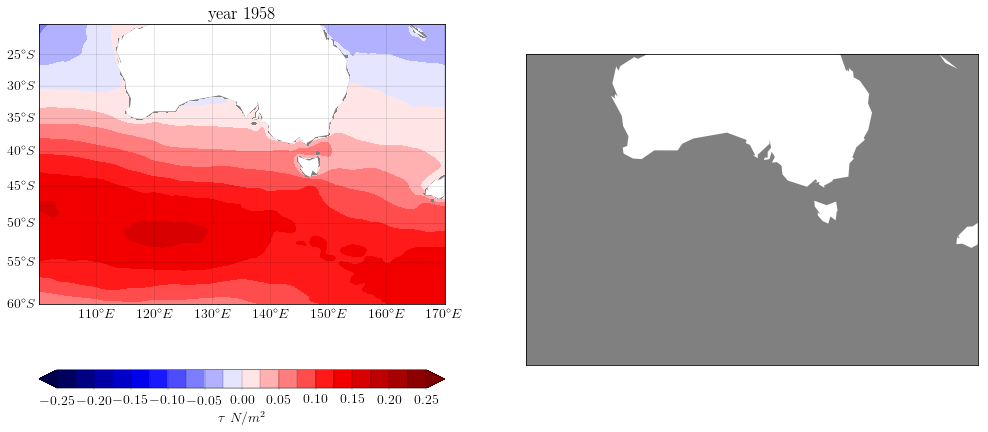

In [95]:
for idx, t in enumerate(file_number[0:1]):
    plt.close('all') 
    fig = plt.figure() 
    fig.set_size_inches(16, 8)
    
    ax = fig.add_subplot(row,col,1)
    cmap = plt.get_cmap('RdBu_r')
    step = 0.025
    contf_lvls = np.arange(-0.25,0.25+1e-08,step)              
            
    ax.set_facecolor('grey')
    bm.drawcoastlines(linewidth=0.05)
    bm.fillcontinents(color='white')
    
    lons, lats = np.meshgrid(lon, lat)
    Bm_lons, Bm_lats = bm(lons, lats) 
    
    contf = bm.contourf(Bm_lons, Bm_lats, tau_x[idx,:,:], contf_lvls, cmap=cmap, extend='both')
    
    ax.set_title('Wind Stress ' + str(t))
    
    bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
    bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])
      
    cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
    cbar.set_label(r'$\tau$ $N/m^{2}$') 
    cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
    
    
    
    ax = fig.add_subplot(row,col,2)
    cmap = plt.get_cmap('RdBu_r')
    step = 0.2
    contf_lvls = np.arange(-2,2+1e-08,step)              
            
    ax.set_facecolor('grey')
    bm.drawcoastlines(linewidth=0.05)
    bm.fillcontinents(color='white')
    
    lons, lats = np.meshgrid(lon, lat)
    Bm_lons, Bm_lats = bm(lons, lats) 
    
    contf = bm.contourf(Bm_lons, Bm_lats, temp_anom[idx,:,:], contf_lvls, cmap=cmap, extend='both')
    
    ax.set_title('Sea Surface Temperature Anomaly' + str(t))
    
    bm.drawmeridians(np.arange(110, 180, 10), linewidth=0.2, labels=[0,0,0,1])
    bm.drawparallels(np.arange(-60, -20, 5), linewidth=0.2, labels=[1,0,0,0])
      
    cbar = plt.colorbar(contf, orientation='horizontal', drawedges=True)
    cbar.set_label(r'$SST$ $^{\circ}C$') 
    cbar.set_ticks(contf_lvls[np.arange(0,np.size(contf_lvls),2)])
    
    
    
    plt.suptitle(r"Wombat jra iaf mom025 tau")
    
    output_ls = os.listdir(figures_path)
    if not script_name:
        script_name = 'test'
    elif script_name not in output_ls:
        os.mkdir(figures_path + '/' + script_name)
    
    plt.savefig(figures_path + '/' + script_name + '/' + script_name[0:3] \
                + '_fig1_' + str(t) + '.png', bbox_inches='tight', dpi=200)




In [68]:
print(nb_name)

p01_plot_yearly_tau.ipynb
